<div style="color:white;
           display:fill;
           border-radius:10px;
           background-color:#058b32;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 5px;
              color:white;">
             Customer Churn Case with Machine Learning
</p>
</div>

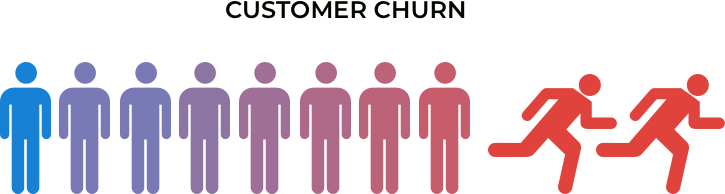

<span style="font-size:20px; color:green">Problem Statement</span>

The objective is to develop a machine learning model that can predict which customers are likely to churn (leave the company). Before building the model, it is essential to perform necessary data analysis and feature engineering steps.

<span style="font-size:20px; color:green">Dataset</span>

The Telco customer churn dataset contains information about a fictional telecommunication company providing home phone and internet services to 7043 customers in California during the third quarter. It includes details on which customers have left, stayed, or signed up for the service.

<span style="font-size:20px; color:green">Dataset Features</span>

The dataset comprises 21 variables and 7043 observations:

- **CustomerID**: Customer ID
- **Gender**: Gender
- **SeniorCitizen**: Whether the customer is a senior citizen (1, 0)
- **Partner**: Whether the customer has a partner (Yes, No) - marital status
- **Dependents**: Whether the customer has dependents (Yes, No) (children, parents, grandparents)
- **Tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Whether the customer has phone service (Yes, No)
- **MultipleLines**: Whether the customer has multiple lines (Yes, No, No phone service)
- **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity**: Whether the customer has online security (Yes, No, No internet service)
- **OnlineBackup**: Whether the customer has online backup (Yes, No, No internet service)
- **DeviceProtection**: Whether the customer has device protection (Yes, No, No internet service)
- **TechSupport**: Whether the customer has tech support (Yes, No, No internet service)
- **StreamingTV**: Whether the customer has streaming TV (Yes, No, No internet service)
- **StreamingMovies**: Whether the customer has streaming movies (Yes, No, No internet service)
- **Contract**: The contract term of the customer (Month-to-month, One year, Two years)
- **PaperlessBilling**: Whether the customer has paperless billing (Yes, No)
- **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer
- **Churn**: Whether the customer churned (Yes or No) - customers who left in the past month or quarter

Each row represents a unique customer. The variables contain information about customer service, account, and demographic data.

<span style="font-size:20px; color:green">Project Outline</span>

Our work consists of three main sections: Exploratory Data Analysis (EDA), Feature Engineering, and Modeling. In the EDA section, we will explore the overall picture, capturing numerical and categorical variables. After analyzing numerical and categorical variables, we will perform target variable analysis. (In the target variable analysis, we will analyze the average of the target variable according to categorical variables and the average of numerical variables according to the target variable.) We will analyze outlier and missing values. Then, we will conduct a correlation analysis. In the feature engineering section, we will fill in missing observations based on missing value analyses and derive new features. We will then perform encoding operations and standardize numerical variables, completing all pre-modeling operations. In the modeling stage, we will apply logistic regression and KNN. Models will be evaluated based on success metrics, and hyperparameter optimization will be applied, building the model with the best parameters.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_curve


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [4]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [6]:
def check_df(dataframe, head=5):
    print("-" * 25 + "Shape" + "-" * 25)
    print(dataframe.shape)
    print("-" * 25 + "Types" + "-" * 25)
    print(dataframe.dtypes)
    print("-" * 25 + "Missing values" + "-" * 25)
    print(dataframe.isnull().sum())
    print("-" * 25 + "Describe the data" + "-" * 25)
    print(dataframe.describe([0, 0.05, 0.25, 0.50, 0.75, 0.90,  0.95, 0.99, 1]).T)
    print("-" * 25 + "Distinct Values" + "-" * 25)
    print(dataframe.nunique())
check_df(df)

-------------------------Shape-------------------------
(7043, 21)
-------------------------Types-------------------------
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
-------------------------Missing values-------------------------
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecuri

In [7]:
df["TotalCharges"].dtypes

dtype('O')

<span style="font-size:18px; color:green">TotalCharges should be numerecial so we can change the type because it looks like object </span>

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')
df["TotalCharges"].dtypes

dtype('float64')

<span style="font-size:18px; color:green">Churn is the target variable that can be converted to 1/0 </span>

In [12]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == 'Yes' else 0)
df["Churn"].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

<span style="font-size:18px; color:green">Analyzing categorical and numerical variables </span>

In [13]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != 'O' ]
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtypes == 'O']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations : {dataframe.shape[0]}")
    print(f"Variables : {dataframe.shape[1]}")
    print(f"cat_cols : {len(cat_cols)}")
    print(f"num_cols : {len(num_cols)}")
    print(f"cat_but_car : {len(cat_but_car)}") #işlevsiz değişken
    print(f"num_but_cat : {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols, num_cols, cat_but_car

Observations : 7043
Variables : 21
cat_cols : 17
num_cols : 3
cat_but_car : 1
num_but_cat : 2


(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'SeniorCitizen',
  'Churn'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'],
 ['customerID'])

<span style="font-size:18px; color:green">Analysis of categorical variables </span>

In [14]:
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                        "Ratio" : 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##############################")
    if plot :
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df,col)

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
##############################
         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
##############################
            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
##############################
              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
##############################
                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##############################
                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667
##########

<span style="font-size:18px; color:green">Analysis of numerical variables </span>

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
max       72.000
Name: tenure, dtype: float64


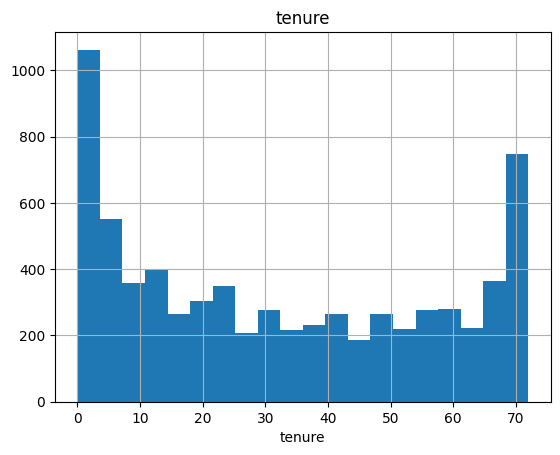

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
max      118.750
Name: MonthlyCharges, dtype: float64


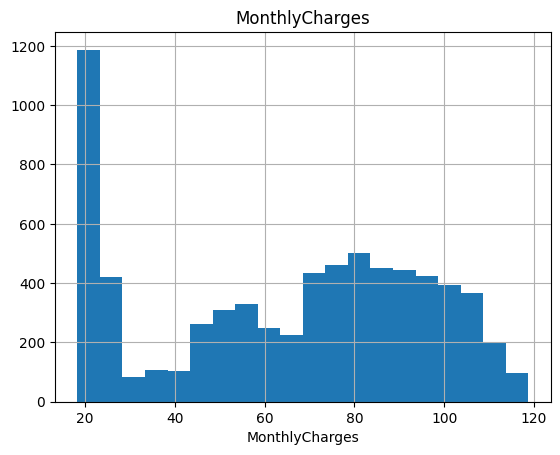

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
max     8684.800
Name: TotalCharges, dtype: float64


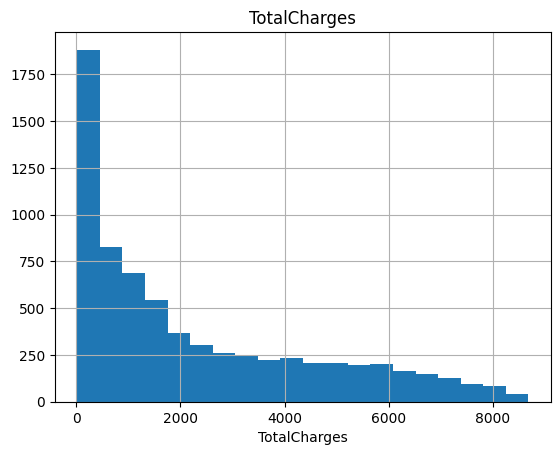

In [16]:
def num_summary(dataframe, numerical_cols, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95]
    print(dataframe[numerical_cols].describe(quantiles).T)
    if plot:
        dataframe[numerical_cols].hist(bins= 20)
        plt.xlabel(numerical_cols)
        plt.title(numerical_cols)
        plt.show()

for col in num_cols:
    num_summary(df,col, True)

<span style="font-size:16px; color:green"># About half of the customers in our dataset are men, the other half are women.
    
<span style="font-size:16px; color:green"># About 50 percent of customers have a partner (married)

<span style="font-size:16px; color:green"># Only 30 percent of total customers have dependents.
    
<span style="font-size:16px; color:green"># 90% of customers receive telephone service.
    
<span style="font-size:16px; color:green"># 53 percent of the 90 per cent who receive telephone service do not have more than one line
    
<span style="font-size:16px; color:green"># 21% of the population has no internet service provider
    
<span style="font-size:16px; color:green"># Most of the customers make month-to-month contracts. 1-year and 2-year contracts have a close number of customers.
    
<span style="font-size:16px; color:green"># 60% of customers have paperless invoices
    
<span style="font-size:16px; color:green"># About 26 percent of customers have left the platform in the last month
    
<span style="font-size:16px; color:green"># 16 percent of the data set consists of older customers, so most of the customers in the data are young

</span>

<span style="font-size:16px; color:green"># When we look at the tenure, we see that 1-month customers are too many, followed by 70-month customers.</span>


<span style="font-size:18px; color:green">Anaysis of Numerical Variables by Target</span>

In [17]:
def target_with_num(dataframe, target, numerical_cols):
    print(dataframe.groupby(target).agg({numerical_cols : "mean"}),end="\n\n\n")

for col in num_cols:
    target_with_num(df, 'Churn',col)

       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




<span style="font-size:16px; color:green"># When we look at the relationship between Tenure and Churn, we see that customers who do not churn have been customers for longer

<span style="font-size:16px; color:green"># When monthlycharges and Churn are analysed, customers with churn have higher average monthly payments</span>



<span style="font-size:18px; color:green">Anaysis of Categorical Variables by Target</span>

In [18]:
def target_with_cat(dataframe, target, categorical_cols):
    print(categorical_cols)
    print(pd.DataFrame({"TARGET_MEAN" : dataframe.groupby(categorical_cols)[target].mean(),
                        "Count" : dataframe[categorical_cols].value_counts(),
                        "Ratio" : 100 * dataframe[categorical_cols].value_counts() / len(dataframe)}), end = "\n\n\n")

for col in cat_cols:
    target_with_cat(df, 'Churn',col)

gender
        TARGET_MEAN  Count  Ratio
gender                           
Female        0.269   3488 49.524
Male          0.262   3555 50.476


Partner
         TARGET_MEAN  Count  Ratio
Partner                           
No             0.330   3641 51.697
Yes            0.197   3402 48.303


Dependents
            TARGET_MEAN  Count  Ratio
Dependents                           
No                0.313   4933 70.041
Yes               0.155   2110 29.959


PhoneService
              TARGET_MEAN  Count  Ratio
PhoneService                           
No                  0.249    682  9.683
Yes                 0.267   6361 90.317


MultipleLines
                  TARGET_MEAN  Count  Ratio
MultipleLines                              
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184


InternetService
                 TARGET_MEAN  Count  Ratio
InternetService                           
DSL                    0.19

<span style="font-size:16px; color:green"># Almost equal churn percentage for men and women
    
<span style="font-size:16px; color:green"># No difference in PhoneServise and MultipleLines

<span style="font-size:16px; color:green"># Loss rate is much higher in Fibre Optic Internet Services
    
<span style="font-size:16px; color:green"># Customers without services such as No OnlineSecurity, OnlineBackup and TechSupport have a high churn rate
    
<span style="font-size:16px; color:green"># A larger percentage of Customers with a monthly subscription churn compared to Customers with one or two-year contracts
    
<span style="font-size:16px; color:green"># Those with paperless billing have a higher churn rate
    
<span style="font-size:16px; color:green"># Customers with the ElectronicCheck PaymentMethod tend to leave the platform more often compared to other options
    
<span style="font-size:16px; color:green"># Older customers have a higher churn percentage
    

</span>


<span style="font-size:18px; color:green">Correlation</span>

In [19]:
df[num_cols].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.248,0.826
MonthlyCharges,0.248,1.000,0.651
TotalCharges,0.826,0.651,1.000


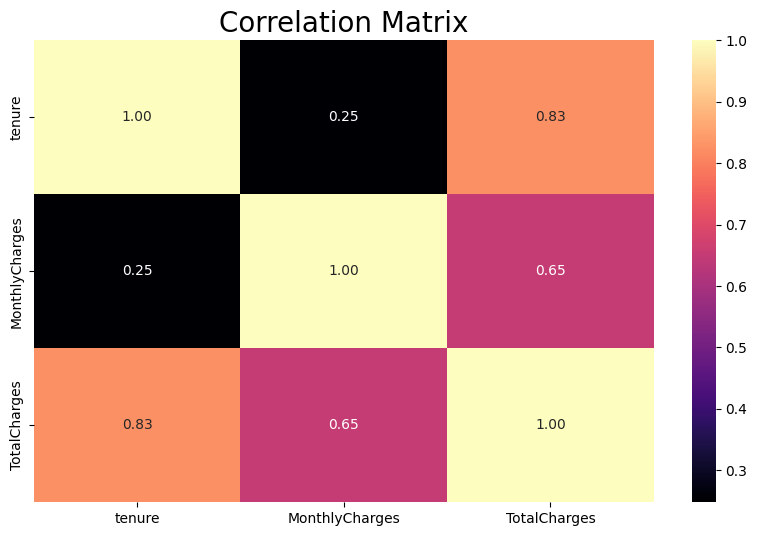

MonthlyCharges    0.193
TotalCharges     -0.199
tenure           -0.352
dtype: float64

In [25]:
f, ax = plt.subplots(figsize=[10, 6])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()
df[num_cols].corrwith(df["Churn"]).sort_values(ascending=False)

<span style="font-size:18px; color:green">Feature Engineering</span>

<span style="font-size:16px; color:green">Missing Values Analysis</span>

In [26]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
missing_values_table(df, True)

              n_miss  ratio
TotalCharges      11  0.160


['TotalCharges']

<span style="font-size:16px; color:green">Let's fill the empty places with median</span>

In [29]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace = True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<span style="font-size:16px; color:green">Outliers Analysis</span>

In [30]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    print(col,check_outlier(df,col))

tenure False
MonthlyCharges False
TotalCharges False


<span style="font-size:16px; color:green">There is no outliers</span>

<span style="font-size:18px; color:green">One Hot Encoding</span>

In [33]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ['Churn']]

In [34]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    dataframe = dataframe.astype(int)
    return dataframe
dff = one_hot_encoder(dff,cat_cols, drop_first= True)

dff.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,1,29,29,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56,1889,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53,108,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,45,42,1840,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70,151,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


<span style="font-size:18px; color:green">Scaling Processing</span>

In [35]:
for col in num_cols:
    dff[col] = RobustScaler().fit_transform(dff[[col]])

In [36]:
dff.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,-0.609,-0.759,-0.404,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.109,-0.259,0.145,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.587,-0.315,-0.381,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.348,-0.519,0.131,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,-0.587,0.000,-0.368,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


<span style="font-size:18px; color:green">Modelling</span>

In [37]:
y = dff['Churn']
X = dff.drop('Churn', axis=1)

In [38]:
log_model = LogisticRegression().fit(X, y)
y_pred = log_model.predict(X)

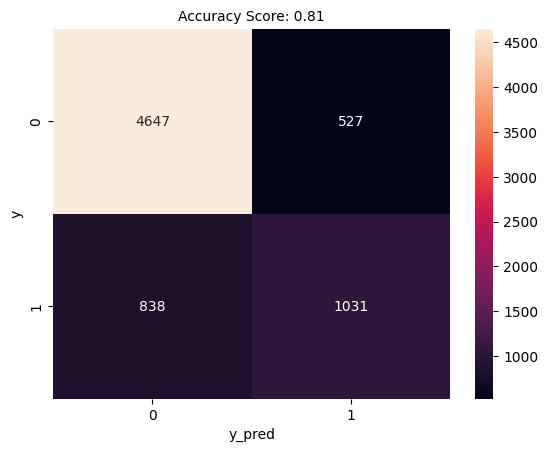

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5174
           1       0.66      0.55      0.60      1869

    accuracy                           0.81      7043
   macro avg       0.75      0.72      0.74      7043
weighted avg       0.80      0.81      0.80      7043



In [39]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y,y_pred)
print(classification_report(y,y_pred))

In [40]:
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

0.8480538056790105

In [44]:
# Model Validation
# Hold-Out Approach
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)
log_model = LogisticRegression().fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1285
           1       0.66      0.50      0.57       476

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



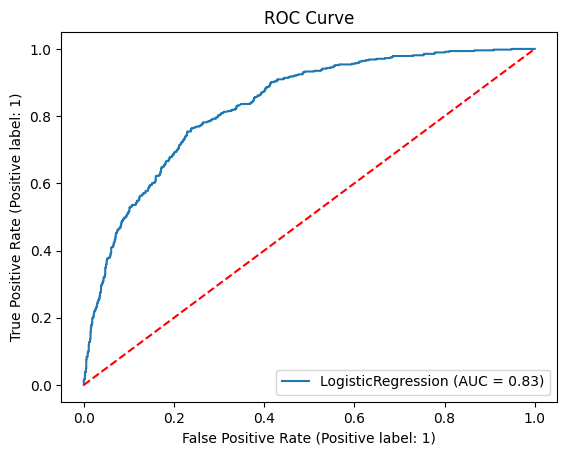

0.8323104339011869

In [47]:
from sklearn.metrics import RocCurveDisplay
# Create the ROC curve display
roc_display = RocCurveDisplay.from_estimator(log_model, X_test, y_test)
# Customize the plot
#roc_display.plot()
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.title('ROC Curve')
plt.show()
# AUC
roc_auc_score(y_test, y_prob)

In [50]:
# Model Validation : 5-Folds Cross Validation

y = dff['Churn']
X = dff.drop('Churn', axis=1)

log_model = LogisticRegression().fit(X, y)

cv_results = cross_validate(log_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
print("acc : ",cv_results['test_accuracy'].mean())
print("recall : ",cv_results['test_recall'].mean())
print("precison : ", cv_results['test_precision'].mean())
print("f1_score : ", cv_results['test_f1'].mean())
print("test_roc_auc", cv_results['test_roc_auc'].mean())


acc :  0.8033516275243564
recall :  0.5494989319149546
precison :  0.6540387053958592
f1_score :  0.5971298394607588
test_roc_auc 0.8452300920639493


In [51]:
log_model = LogisticRegression().fit(X, y)

cv_results = cross_validate(log_model,
                            X, y,
                            cv=10,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
print("acc : ",cv_results['test_accuracy'].mean())
print("recall : ",cv_results['test_recall'].mean())
print("precison : ", cv_results['test_precision'].mean())
print("f1_score : ", cv_results['test_f1'].mean())
print("test_roc_auc", cv_results['test_roc_auc'].mean())

acc :  0.8036347517730495
recall :  0.5473837042148239
precison :  0.6557664892745454
f1_score :  0.5964245611898927
test_roc_auc 0.8451084600304298


In [53]:
# KNN
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X,y)
random_user = X.sample(1, random_state=45)
knn_model.predict(random_user)

y_pred = knn_model.predict(X)
y_prob = knn_model.predict_proba(X)[:,1]
print(classification_report(y,y_pred))
roc_auc = roc_auc_score(y,y_prob)
print("roc_auc",roc_auc)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5174
           1       0.72      0.63      0.68      1869

    accuracy                           0.84      7043
   macro avg       0.80      0.77      0.78      7043
weighted avg       0.83      0.84      0.84      7043

roc_auc 0.8985265670658928


In [55]:
cv_result = cross_validate(knn_model, X, y, cv=5, scoring=['accuracy','f1','roc_auc'])

print("acc : ",cv_results['test_accuracy'].mean())
print("f1_score : ", cv_results['test_f1'].mean())
print("test_roc_auc", cv_results['test_roc_auc'].mean())

knn_model.get_params()

acc :  0.8036347517730495
f1_score :  0.5964245611898927
test_roc_auc 0.8451084600304298


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

<span style="font-size:18px; color:green">Hyperparameter Optimization</span>

In [56]:
knn_model = KNeighborsClassifier()
knn_model.get_params()
knn_params = {'n_neighbors': range(2,50)}

knn_gs_best = GridSearchCV(knn_model, knn_params, cv=5, n_jobs= -1, verbose= 1).fit(X,y)
knn_gs_best.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'n_neighbors': 42}

<span style="font-size:18px; color:green">Create a model after hyperparamater optimization</span>

In [57]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X,y)

cv_results = cross_validate(knn_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [58]:
print("acc : ",cv_results['test_accuracy'].mean())
print("f1_score : ", cv_results['test_f1'].mean())
print("test_roc_auc", cv_results['test_roc_auc'].mean())

acc :  0.8006534695786826
f1_score :  0.5999128922617883
test_roc_auc 0.834669059026764


In [59]:
random_user = X.sample(1)
knn_final.predict(random_user)

array([0])